# Comment les réseaux de neurones gèrent les données non séparables

[Lien du post MonShotData](https://www.monshotdata.com/p/reseaux-neurones-non-lineaires)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns

from sklearn.datasets import make_circles

sns.set()

In [2]:
plt.rcParams['font.family'] = ['Times New Roman', 'sans-serif']

In [3]:
df = pd.read_csv("../_datasets/n_arm_spiral.csv", sep = ";", names = ["X1", "X2", "Y"])

In [4]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF', '#FF7051', "orange", "darkorange", "tomato", "coral", "limegreen", "lightsalmon"]

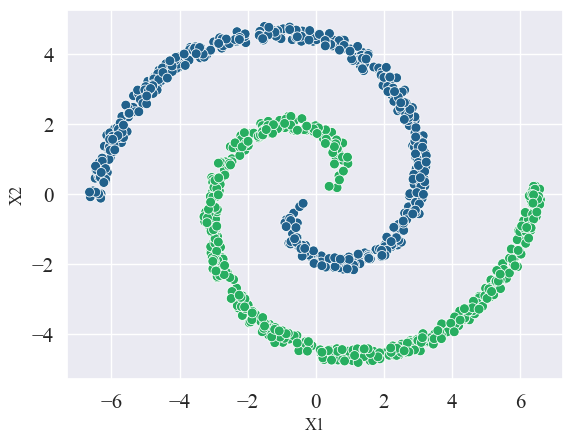

In [5]:
selected = [colors[3], colors[8], colors[14]]

sns.scatterplot(data = df, x = "X1", y = "X2", s = 50, c = [selected[label] for label in df["Y"]])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [6]:
X = df[["X1","X2"]].values
y = df.Y.values

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

x_min, x_max = float(X[:, 0].min()), float(X[:, 0].max())
y_min, y_max = float(X[:, 1].min()), float(X[:, 1].max())

X[:, 0] = (X[:, 0] - x_min)/(x_max-x_min)
X[:, 1] = (X[:, 1] - y_min)/(y_max-y_min)

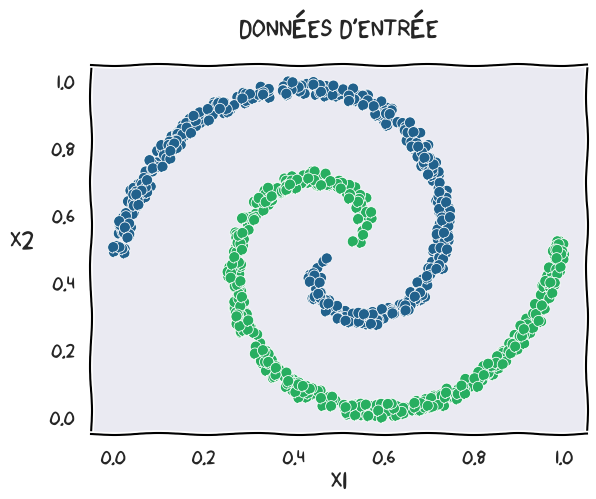

In [7]:
selected = [colors[3], colors[8], colors[14]]

with plt.xkcd():
    sns.scatterplot(data = df, x = X[:, 0], y = X[:, 1], s = 50, c=[selected[label] for label in df["Y"]])
    plt.xlabel("x1", fontweight = "bold", size = 20)
    plt.xticks(size = 15)
    plt.ylabel("x2", fontweight = "bold", size = 20, rotation = 0, labelpad=20)
    plt.yticks(size = 15)
    plt.title("DONNÉES D'ENTRÉE", fontweight = "bold", size = 20, pad =20)
    plt.show()

In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, classes=3):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 2)
        self.fc4 = nn.Linear(2, classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x
    
def accuracy(outputs, labels):
    return int(torch.sum(torch.argmax(outputs, axis = 1) == y))/len(outputs)

In [9]:
input_size = 2
hidden_size = 400
total_epochs = 300
model = NeuralNetwork(input_size, hidden_size, classes=2)

# Définir la fonction de perte et l’optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

for epoch in range(total_epochs):

    outputs = model(X)
    loss = criterion(outputs, y)

    # Rétropropagation et optimisation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    acc = accuracy(outputs, y)
    if epoch%50 == 0:
        print(f"{epoch = }, {acc = }")

## Obtenir la sortie de la dernière couche cachée
x = F.relu(model.fc1(X))
x = F.relu(model.fc2(x))
x = (model.fc3(x)).detach().numpy()

epoch = 0, acc = 0.5
epoch = 50, acc = 0.851
epoch = 100, acc = 0.981
epoch = 150, acc = 0.995
epoch = 200, acc = 0.999
epoch = 250, acc = 1.0


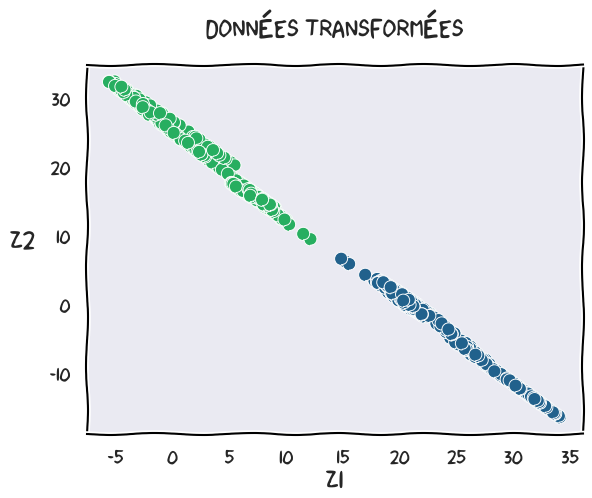

In [10]:
with plt.xkcd():    
    ax_ = sns.scatterplot(x = x[:, 0], y = x[:, 1], c = [selected[int(label)] for label in y], s = 70, )
    plt.xlabel("z1", fontweight = "bold", size = 20)
    plt.xticks(size = 15)
    plt.ylabel("z2", fontweight = "bold", size = 20, rotation = 0, labelpad = 20)
    plt.yticks(size = 15)
    plt.title("DONNÉES TRANSFORMÉES", fontweight = "bold", size = 20, pad =20)
    
    plt.show()